In [13]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import skimage.io as io
import random

# Specify the paths to the COCO annotations and images directories
dataDir = './/data'
dataType = 'val2017'  # or 'val2017' for the validation set
annFile = f'{dataDir}/annotations/instances_{dataType}.json'
imgDir = f'{dataDir}/images/{dataType}'

# Initialize the COCO API for the specified data type
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.81s)
creating index...
index created!


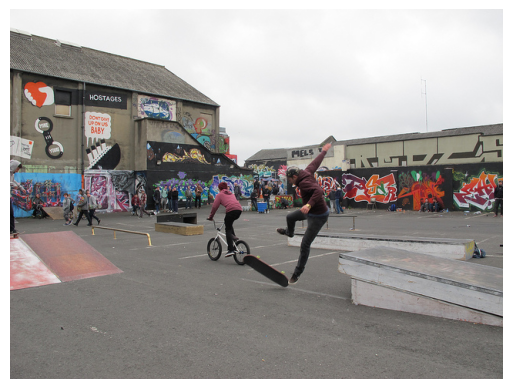

In [32]:
def load_random_img(id = None, showAnns = False):

    # Get all image ids in the dataset
    imgIds = coco.getImgIds()

    # Pick a random image ID
    random_img_id = random.choice(imgIds)
    if id:
        random_img_id = imgIds[id]

    # Load and display a random sample image with annotations
    img_info = coco.loadImgs(random_img_id)[0]
    img_path = f"{imgDir}/{img_info['file_name']}"

    # Load the image using skimage.io
    img = io.imread(img_path)

    # Load and display annotations
    if showAnns:
        annIds = coco.getAnnIds(imgIds=random_img_id)
        anns = coco.loadAnns(annIds)

    # Display the image with annotations
    plt.imshow(img)
    if showAnns:
        coco.showAnns(anns)
    plt.axis('off')
    plt.show()

load_random_img(id = 3, showAnns=False)